# Code reusability

Some fuzzy jargon:
- **Scripts:** Python files that contain commands in logical order, is run directly and does something (i.e., has an output). Scripts may include functions, but those functions are called within the script.
- **Modules:** Files containing classes, functions, and variables that are designed to be imported by scripts or other modules (e.g., the Utilities.py file)
- **Packages:** A collection of related modules. Can be either local or called from the Python Package Index (PyPI, pip install x). Has an "__init__" file.
- **Libraries:** A bundle of packages, such as the python standard library.


### Example of a script

''

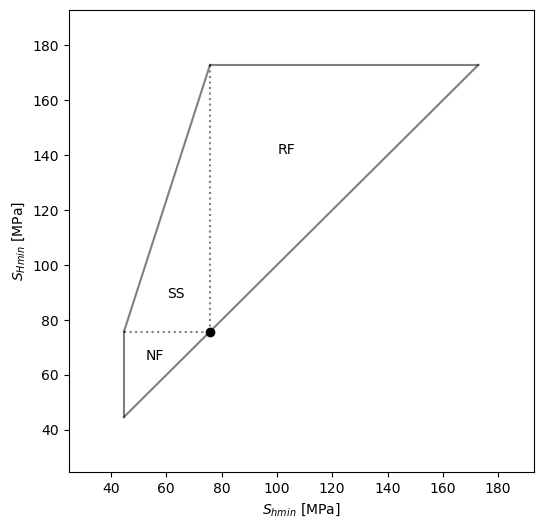

In [7]:

import numpy as np
from matplotlib import pyplot as plt

#
# Input parameters
#

Pp = 30 # MPa for 4400 psi from Zoback homework
Sv = 75.8 # MPa for 11000 psi from Zoback homework
mu = 0.6 # coefficient of friction

import matplotlib.pyplot as plt

# 
# Use frictional faulting theory to constrain limits of the stress polygon
# 

# Extension limit of the stress polygon
# S_hmin = S_Hmax << S_v

def minstress(S1,Pp,mu):
    '''Use the stress ratio and frictional faulting theroy to constrain minimum stress
    
    My calculations assume MPa, but other pressure units (Pa, psi) could be used
    
        Args:       Pp pore pressure 
                    S1 maximum stress
        
        Returns:    S3 minimum stress
    '''
    S3 = ((S1-Pp)/(((mu**2 + 1.)**0.5 + mu)**2))+Pp
    return S3


# Compression limit of the stress polygon
# S_hmin = S_Hmax >> S_v

def maxstress(S3,Pp,mu):
    '''Use the stress ratio and frictional faulting theory to constrain the maximum stress
    
        My calculations assume MPa, but other pressure units (Pa, psi) could be used
    
        Args:       Pp pore pressure 
                    S3 minimum stress
        
        Returns:    S1 maximum stress
    '''
    S1 = ((S3-Pp)*(((mu**2 + 1.)**0.5 + mu)**2))+Pp
    return S1



# define stress limits using the functions

minSh = minstress(Sv,Pp,mu)
maxSh = maxstress(Sv,Pp,mu)
minSH = minSh 
maxSH = maxSh

#
# Generate stress polygon
#

fig, ax = plt.subplots(1,1,figsize=(6,6))

# Vertical stress
ax.plot(Sv,Sv,'o',color='k')         # 2. Central point $ S_hmin = S_Hmax = S_v $

# Connecting lines
ax.plot([minSh,minSh],[minSh,Sv],color='k',alpha=0.5) 
ax.plot([minSh,Sv],[Sv,maxSH],color='k',alpha=0.5)
ax.plot([Sv,maxSh],[maxSH,maxSH],color='k',alpha=0.5)
ax.plot([minSh,Sv],[Sv,Sv],color='k',linestyle=':',alpha=0.5)
ax.plot([Sv,Sv],[Sv,maxSH],color='k',linestyle=':',alpha=0.5)
ax.plot([minSh,maxSH],[minSh,maxSH],color='k',alpha=0.5)

# Labels
ax.text((maxSH-Sv)/4+Sv,(maxSH-Sv)/1.5+Sv, 'RF', fontsize=10)
ax.text((Sv-minSh)/2+minSh,(maxSH-Sv)/8+Sv, 'SS', fontsize=10)
ax.text((Sv-minSh)/4+minSh,(Sv-minSh)/1.5+minSh, 'NF', fontsize=10)

# Format plot

ax.set_xlim(minSh-20, maxSh+20)
ax.set_ylim(minSh-20, maxSh+20)

ax.set_xlabel('$S_{hmin}$ [MPa]')
ax.set_ylabel('$S_{Hmin}$ [MPa]')

;

## Same script, but uses a module

In [ ]:
from Utilities import *

# Input parameters

Pp = 30 # MPa for 4400 psi from Zoback homework
Sv = 75.8 # MPa for 11000 psi from Zoback homework
mu = 0.6 # coefficient of friction


